<h1 style="color:blue">Imbalance Technique: SMOTE</h1>

# Importing Required Libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# import library to ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h1 style="color: red;">Dataset Details</h1>
  <ul style="list-style-type: none; padding-left: 20px;">
    <h3><li style="color: green;">Name : Credit-card-Fraud Detection-Imbalanced-Dataset</li></h3>
   <h3><li style="color: green;">URL : https://www.kaggle.com/datasets/dark06thunder/credit-card-dataset</li></h3>
  </ul>

In [2]:
path = "../Datasets/credit_dataset.csv"
data = pd.read_csv(path)
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [3]:
label = "TARGET"
data.drop(columns=["ID", "Unnamed: 0"], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          25134 non-null  object 
 1   CAR             25134 non-null  object 
 2   REALITY         25134 non-null  object 
 3   NO_OF_CHILD     25134 non-null  int64  
 4   INCOME          25134 non-null  float64
 5   INCOME_TYPE     25134 non-null  object 
 6   EDUCATION_TYPE  25134 non-null  object 
 7   FAMILY_TYPE     25134 non-null  object 
 8   HOUSE_TYPE      25134 non-null  object 
 9   FLAG_MOBIL      25134 non-null  int64  
 10  WORK_PHONE      25134 non-null  int64  
 11  PHONE           25134 non-null  int64  
 12  E_MAIL          25134 non-null  int64  
 13  FAMILY SIZE     25134 non-null  float64
 14  BEGIN_MONTH     25134 non-null  int64  
 15  AGE             25134 non-null  int64  
 16  YEARS_EMPLOYED  25134 non-null  int64  
 17  TARGET          25134 non-null 

<h2 style="color:red"> Imbalance Data</h2>

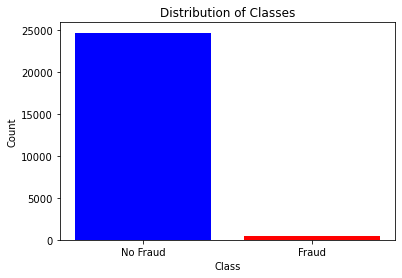

In [5]:
# imbalance
target_counts = data['TARGET'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['blue', 'red'])
plt.xticks(target_counts.index, ['No Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

# Data Cleaning

## Handling Duplicate Values

In [7]:
duplicates = data[data.duplicated()]
print(len(duplicates))
data.drop_duplicates(inplace=True, keep="first")
duplicates = data[data.duplicated()]
print(len(duplicates))

0
0


## Handling Null Values

In [ ]:
data.isna().sum()

GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

# EDA Analysis

In [8]:
def EDA(df):
    print("\nSummary Statistics:")
    print(df.describe())

    # Visualize distribution of numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature].dropna(), kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # correlation matrix
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()


Summary Statistics:
        NO_OF_CHILD        INCOME  FLAG_MOBIL    WORK_PHONE         PHONE  \
count  22196.000000  2.219600e+04     22196.0  22196.000000  22196.000000   
mean       0.514147  1.938834e+05         1.0      0.274148      0.292215   
std        0.792126  1.032757e+05         0.0      0.446094      0.454791   
min        0.000000  2.700000e+04         1.0      0.000000      0.000000   
25%        0.000000  1.350000e+05         1.0      0.000000      0.000000   
50%        0.000000  1.800000e+05         1.0      0.000000      0.000000   
75%        1.000000  2.250000e+05         1.0      1.000000      1.000000   
max       19.000000  1.575000e+06         1.0      1.000000      1.000000   

             E_MAIL   FAMILY SIZE   BEGIN_MONTH           AGE  YEARS_EMPLOYED  \
count  22196.000000  22196.000000  22196.000000  22196.000000    22196.000000   
mean       0.100964      2.295774     25.988151     40.515048        7.189043   
std        0.301288      0.951238     16.3

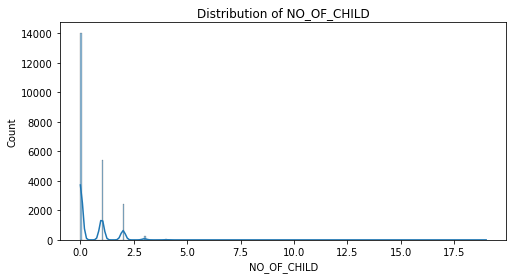

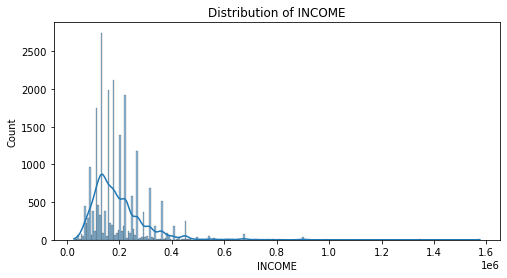

C:\Users\mkami\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


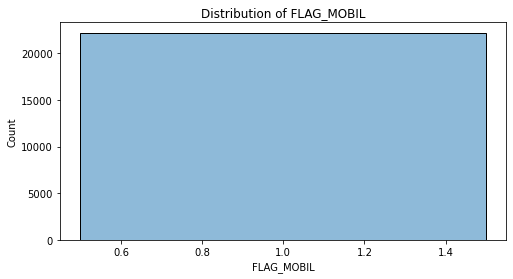

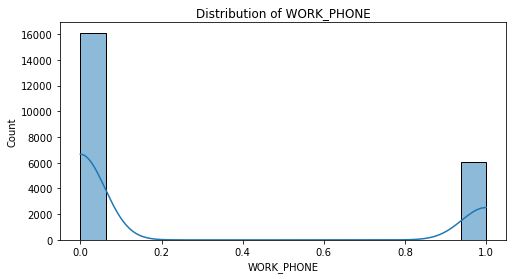

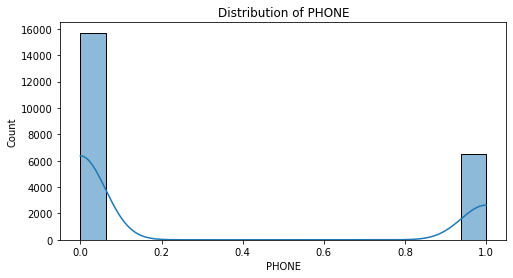

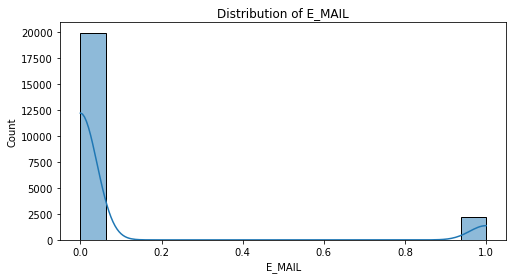

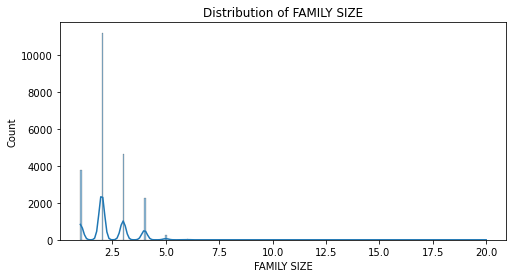

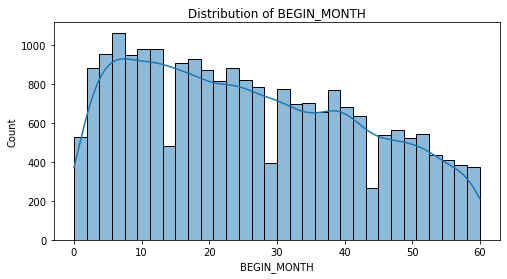

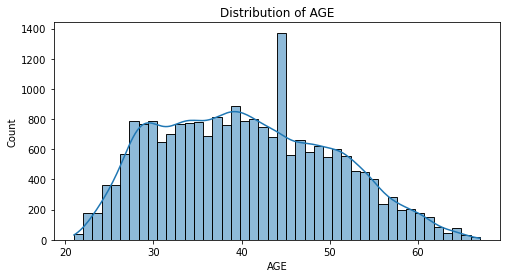

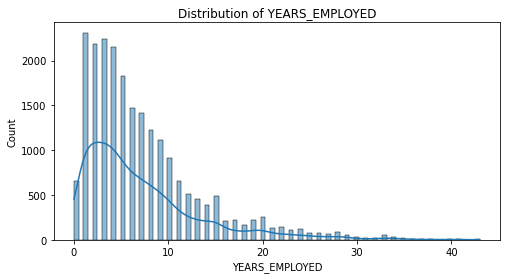

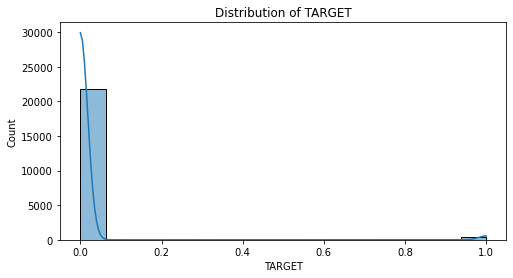

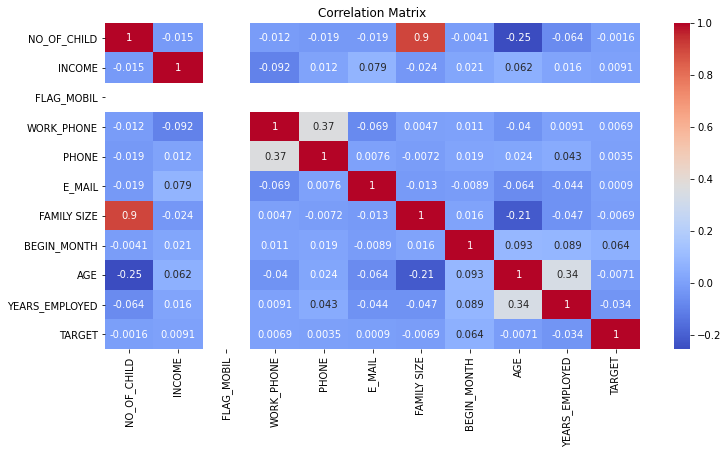

In [9]:
EDA(data)

# Encoding the Categorical data points

In [ ]:
categorical_features = data[data.select_dtypes(include=['object']).columns.tolist()]
label_encoder = LabelEncoder()

for feature in categorical_features:
    data.loc[:, feature] = label_encoder.fit_transform(data[feature])

In [ ]:
data.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,2.0,29,59,3,0
1,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,4,52,8,0
2,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,26,52,8,0
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,38,52,8,0
5,1,1,1,0,270000.0,4,1,1,1,1,1,1,1,2.0,5,46,2,0


# Feature Selection Techniques

In [ ]:
X = data.drop(columns=[label])
y = data[label]

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X, y)

DecisionTreeClassifier()

In [ ]:
# Get feature importances by their scores
from sklearn.feature_selection import SelectFromModel

feature_importances = dt_classifier.feature_importances_
feature_importances

array([0.0114189 , 0.04293497, 0.02859161, 0.01987819, 0.14130295,
       0.05291377, 0.02937317, 0.05481832, 0.02395854, 0.        ,
       0.02262294, 0.02516354, 0.01978953, 0.036334  , 0.25166247,
       0.13520362, 0.10403346])

In [ ]:
# Select features based on importance scores
selected_features = SelectFromModel(dt_classifier, threshold=0.05)  # Adjust threshold as needed
selected_features.fit(X, y)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.05)

In [ ]:
# Get selected feature indices
selected_feature_indices = selected_features.get_support(indices=True)
selected_feature_indices

array([ 4,  5, 14, 15, 16], dtype=int64)

In [ ]:
# # Select the features from the original dataset
selected_X = X.iloc[:, selected_feature_indices]
selected_X.columns

Index(['INCOME', 'INCOME_TYPE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED'], dtype='object')

In [ ]:
selected_X.head()

,INCOME,INCOME_TYPE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,112500.0,4,29,59,3
1,270000.0,0,4,52,8
2,270000.0,0,26,52,8
4,270000.0,0,38,52,8
5,270000.0,4,5,46,2


# Data Transformation

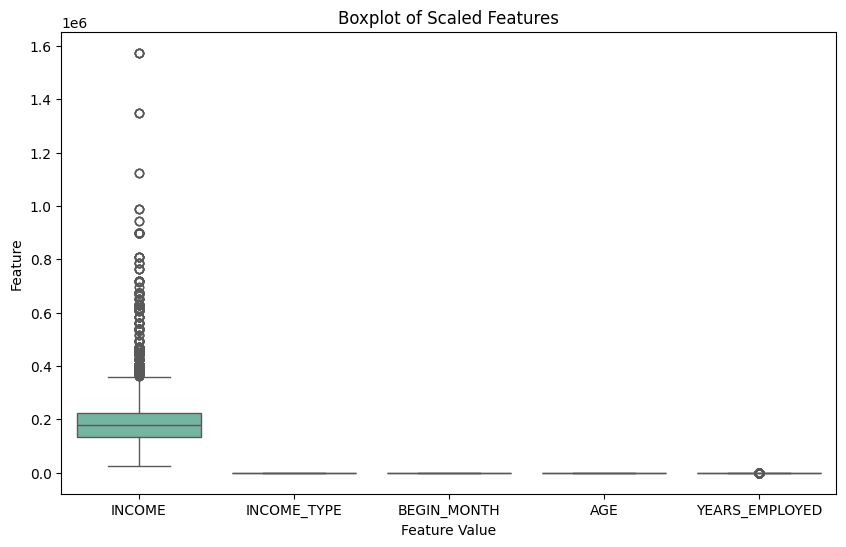

In [ ]:
def plot_box(df):
    # Plot boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, orient="v", palette="Set2")
    plt.title("Boxplot of Scaled Features")
    plt.xlabel("Feature Value")
    plt.ylabel("Feature")
    plt.show()

plot_box(selected_X)

In [ ]:
scaler = StandardScaler()
# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(selected_X)

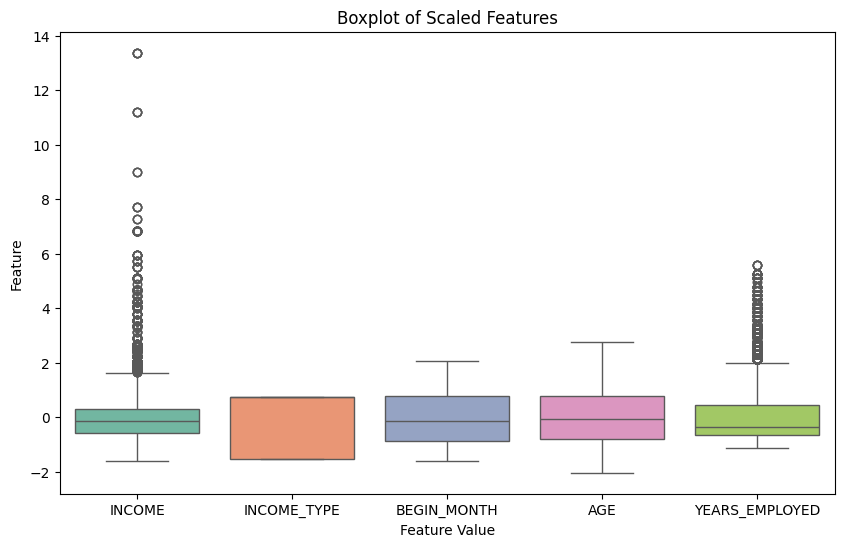

In [ ]:
df_scaled = pd.DataFrame(X_scaled, columns=selected_X.columns)
plot_box(df_scaled)


# Different classification Models
<h1 style="color: blue;">Selected Classifcation Models:</h1>
  <ol>
    <h3><li style="color: green;">KNN</li></h3>
   <h3><li style="color: green;">SVM </li></h3>
    <h3><li style="color: green;">Naive Bayes</li></h3>
   <h3><li style="color: green;">Decision Tree</li></h3>
    <h3><li style="color: green;">Logistic Regression</li></h3>
  </ol>

<h2 style="color:red"> Without Cross Validation SPlitting</h2>

In [ ]:
def get_split(X, y):
    return train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)
X = X_scaled

<h1 style="color: indigo;">Confusion matrix Function</h1>

In [ ]:
def plot_cm(cm):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

<h1 style="color: indigo;">Function: Classification Report & Confusion Matric</h1>

In [ ]:
def train_test_visualize(model, X, y):
    y_pred = cross_val_predict(model, X, y, cv=5)
    cm = confusion_matrix(y, y_pred)
    plot_cm(cm)
    # Generate classification report
    report = classification_report(y, y_pred, zero_division=1)
    print("Classification Report:\n", report)

<h1 style="color: red;">Baseline Execution</h1>

<h2 style="color: blue;">1- KNN</h2>

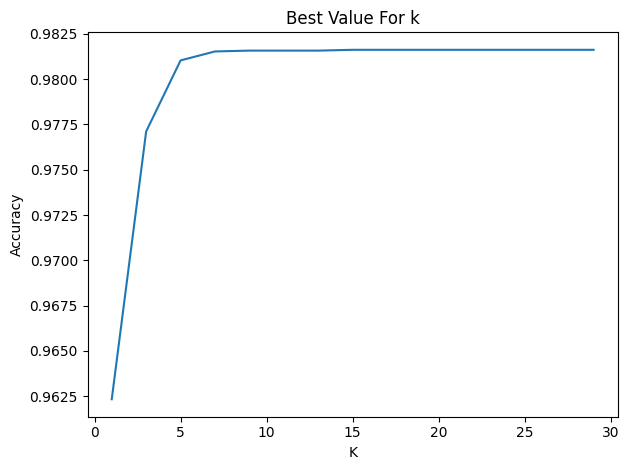

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def plot_knn(X, y):
  k_values = range(1, 30, 2)

  # Train KNN classifiers with different k values
  scores = list()
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    score = accuracy_score(y, y_pred)
    scores.append(score)

  plt.plot(k_values, scores)
  plt.title("Best Value For k")
  plt.xlabel('K')
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

  return k_values[scores.index(max(scores))]


k = plot_knn(X, y)

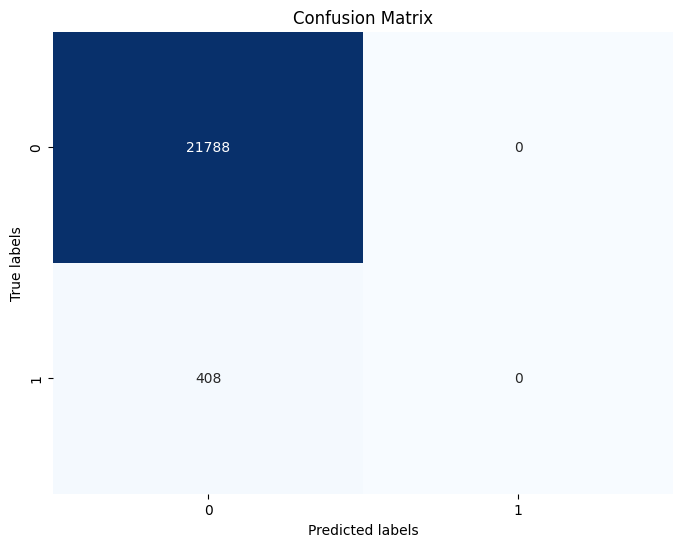

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       1.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.99      0.50      0.50     22196
weighted avg       0.98      0.98      0.97     22196



In [ ]:
def run_knn(X, y):
  knn = KNeighborsClassifier(n_neighbors=k)
  train_test_visualize(knn, X, y)

run_knn(X, y)

<h2 style="color: blue;">2- Logistic Regression</h2>

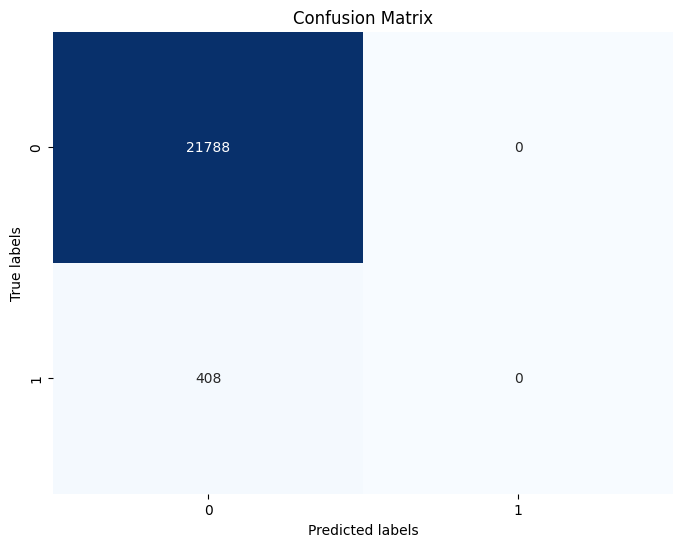

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       1.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.99      0.50      0.50     22196
weighted avg       0.98      0.98      0.97     22196



In [ ]:
from sklearn.linear_model import LogisticRegression

def run_lr(X, y):
  lr = LogisticRegression(max_iter=500)
  train_test_visualize(lr, X, y)

run_lr(X, y)

<h2 style="color: blue;">3- Decision Tree Classifier</h2>

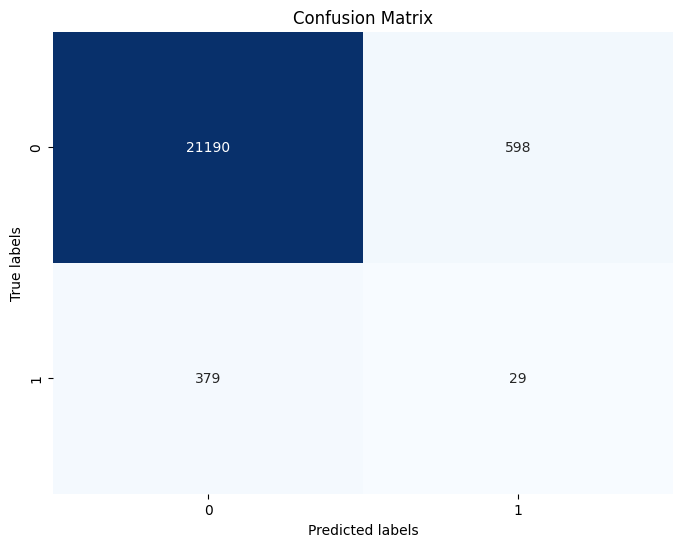

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     21788
           1       0.05      0.07      0.06       408

    accuracy                           0.96     22196
   macro avg       0.51      0.52      0.52     22196
weighted avg       0.97      0.96      0.96     22196



In [ ]:
from sklearn.tree import DecisionTreeClassifier

def run_tree(X, y):
  tree_model = DecisionTreeClassifier()
  train_test_visualize(tree_model, X, y)

run_tree(X, y)

<h2 style="color: blue;">4- SVM</h2>

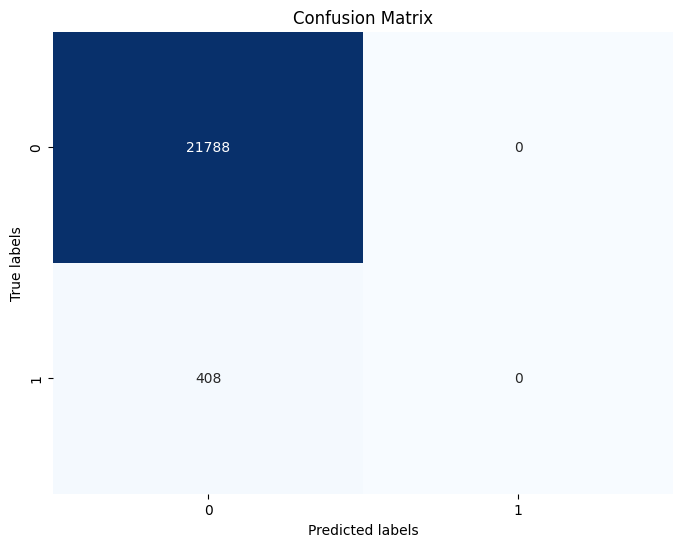

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       1.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.99      0.50      0.50     22196
weighted avg       0.98      0.98      0.97     22196



In [ ]:
def run_svm(X, y):
  # Initialize SVM classifier
  svm_model = SVC(kernel='linear')

  train_test_visualize(svm_model, X, y)

run_svm(X, y)

<h2 style="color: blue;">5- Naive Bayes</h2>

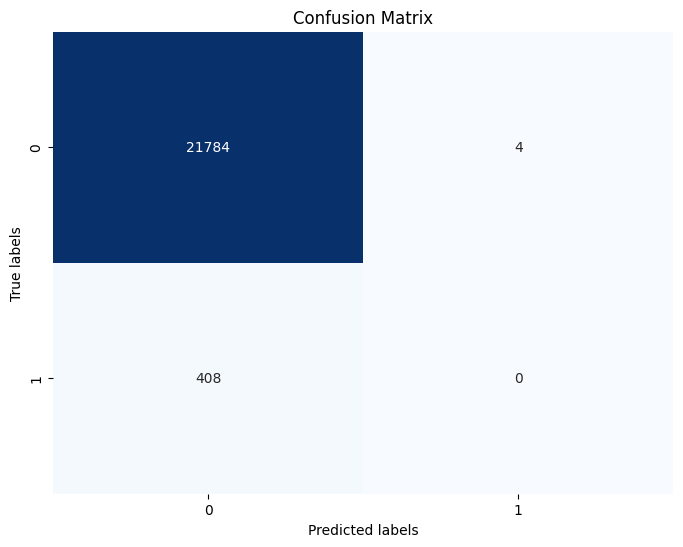

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21788
           1       0.00      0.00      0.00       408

    accuracy                           0.98     22196
   macro avg       0.49      0.50      0.50     22196
weighted avg       0.96      0.98      0.97     22196



In [ ]:
from sklearn.naive_bayes import GaussianNB

def run_nb(X, y):
    nb_classifier = GaussianNB()
    train_test_visualize(nb_classifier, X, y)

run_nb(X, y)

<h1 style="color: red;">Class Imbalance Technique</h1>
<h2 style="color: blue;">SMOTE</h2>

In [ ]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# just checking numbers of records after applying smote
print(len(y_res), len(y))
print(len(y_res[y_res == 0]), len(y[y == 0]))
print(len(y_res[y_res == 1]), len(y[y == 1]))

43576 22196
21788 21788
21788 408


In [ ]:
X = X_res
y = y_res

<h2 style="color:yellow">As i have make functions of each model before class imbalance techniques so now  after applying class imbalance techniques i am just calling to existing functions and comparing results before anb after class imbalance techniques</h2>

<h2 style="color: blue;">1- KNN</h2>

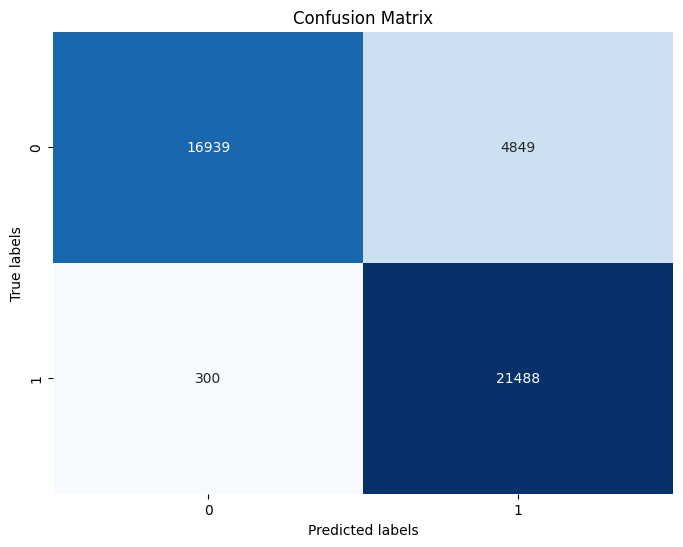

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87     21788
           1       0.82      0.99      0.89     21788

    accuracy                           0.88     43576
   macro avg       0.90      0.88      0.88     43576
weighted avg       0.90      0.88      0.88     43576



In [ ]:
run_knn(X, y)

<h2 style="color: blue;">2- Logistic Regression</h2>

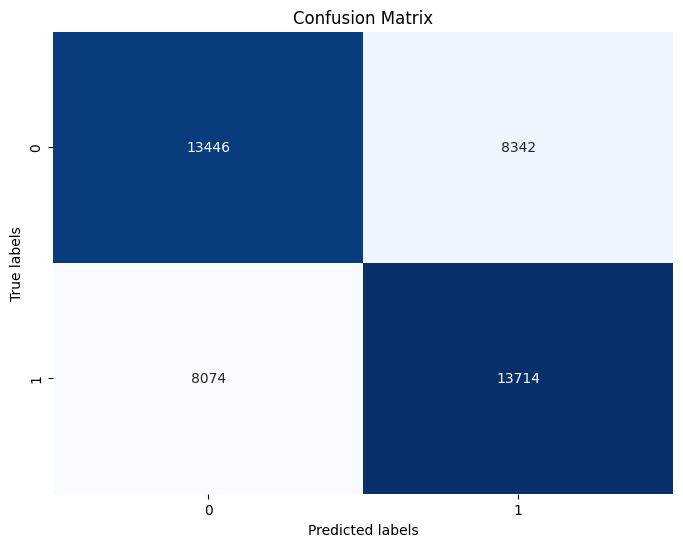

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62     21788
           1       0.62      0.63      0.63     21788

    accuracy                           0.62     43576
   macro avg       0.62      0.62      0.62     43576
weighted avg       0.62      0.62      0.62     43576



In [ ]:
run_lr(X, y)

<h2 style="color: blue;">3- Decision Tree</h2>

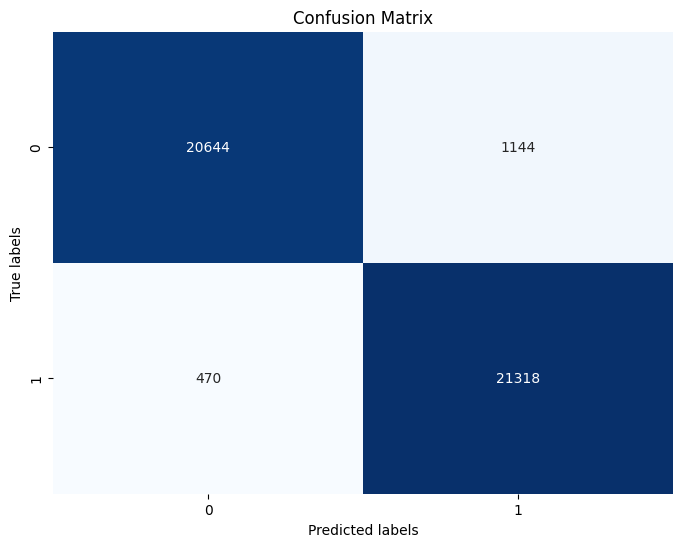

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     21788
           1       0.95      0.98      0.96     21788

    accuracy                           0.96     43576
   macro avg       0.96      0.96      0.96     43576
weighted avg       0.96      0.96      0.96     43576



In [ ]:
run_tree(X, y)

<h2 style="color: blue;">4- SVM</h2>

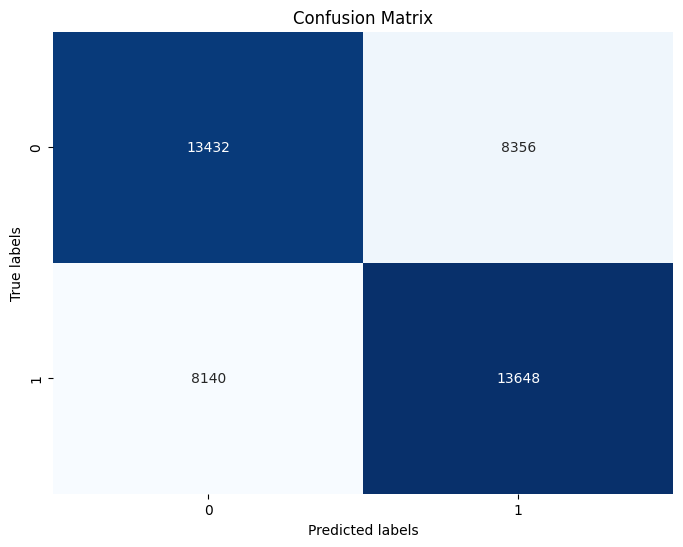

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62     21788
           1       0.62      0.63      0.62     21788

    accuracy                           0.62     43576
   macro avg       0.62      0.62      0.62     43576
weighted avg       0.62      0.62      0.62     43576



In [ ]:
run_svm(X, y)

<h2 style="color: blue;">5- Naive Bayes</h2>

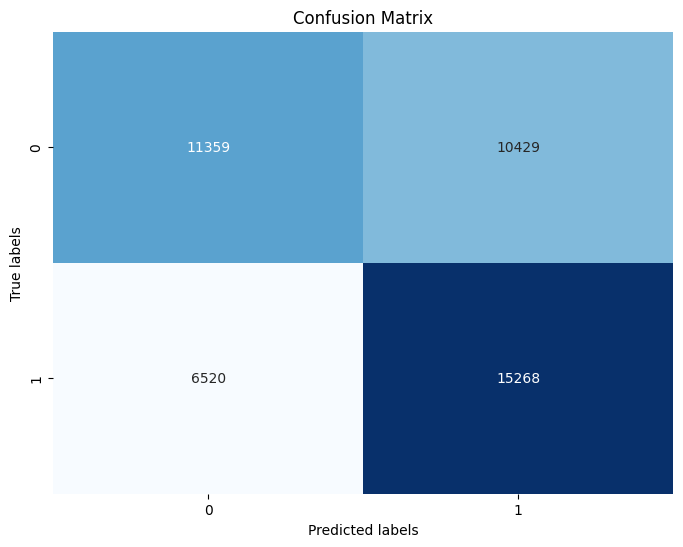

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.52      0.57     21788
           1       0.59      0.70      0.64     21788

    accuracy                           0.61     43576
   macro avg       0.61      0.61      0.61     43576
weighted avg       0.61      0.61      0.61     43576



In [ ]:
run_nb(X, y)

<h1 style="color: blue;">Conclusion</h1>

<h1 style="color:green">
Beofre and after applying the SMOTE to address class imbalance in the credit card fraud detection dataset there is  significant improvements in the performance of the classification algorithms like below i mentioned:</h1> <br>
<h3 style="color:blue">
   -> Before SMOTE KNN had a high precision but low recall for the minority class. But after applying SMOTE both precision and recall improved significantly, resulting in a balanced F1-score for both classes. <br> <br>
 -> Logistic regression showed a significant improvement in both precision and recall for the minority class after applying SMOTE. However, the overall performance is moderate compared to other algorithms. <br> <br>
  -> Before SMOTE the decision tree had low recall for the minority class. But after applying SMOTE both precision and recall improved drastically, resulting in a balanced F1-score for both classes. <br> <br>
 -> SVM exhibited similar behavior to logistic regression with a moderate performance improvement after applying SMOTE, but still not as balanced as other algorithms.<br> <br>
    -> Naive Bayes had a low recall for the minority class before applying SMOTE. After applying SMOTE, there was an improvement in recall but precision decreased, indicating a trade-off between precision and recall.<br> <br>
      
</h3>

<h2 style="color:red">  So i can conclude that the SMOTE technique significantly improved the performance of all classification algorithms by addressing the class imbalance in the credit card fraud detection dataset</h2>